In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair,mybar_pair,myboxplot_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255 

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100

data_path = "../data/"

### vRF: Eccentricity, Size, Gain

p(without correction):[0.0026, 0.8045, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[0.0184, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p(without correction):[0.0, 0.0, 0.0001, 0.9718, 0.0, 0.0, 0.0]
p(correction):[0.0, 0.0, 0.0008, 1.0, 0.0, 0.0, 0.0]
p(without correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
p(correction):[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_44252\3946352710.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig2-vRF.pdf', bbox_inches='tight')
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


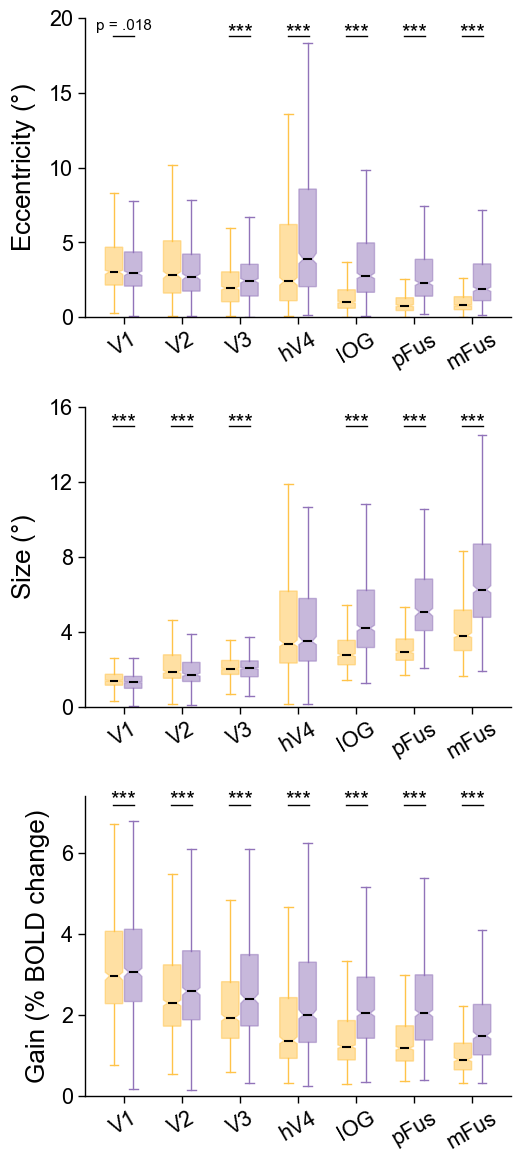

In [ ]:
vRF_allv = np.load(data_path+'vRF.npz',allow_pickle=True)['vRF_allv']
vRFv = vRF_allv.reshape(vRF_allv.shape[0],vRF_allv.shape[1],vRF_allv.shape[2]*vRF_allv.shape[3],vRF_allv.shape[4])
vRFv = np.transpose(vRFv, axes=(2,1,0,3)) # 800sampmle x 7roi x 2task x 8properties
vRFv[:,:,[0,1],:] = vRFv[:,:,[1,0],:] # face-digit
idxs  = [3,5,7] # index for eccentricity, size and gain

set_figure()
fig,axes = plt.subplots(3,1,figsize=(5.5,14),gridspec_kw={'hspace': 0.3})
ylims = [[0,20,5],[0,16,4],[0,7.4,2]]
ylbls = [r'Eccentricity ($\degree$)',r'Size ($\degree$)',r'Gain (% BOLD change)']
pys = [[19,18.8],[15.15,15],[7.3,7.2]]
w = 0.35
for yi in range(len(idxs)):
    # two-tailed sign test
    ps0,sts = pair_test(vRFv[:,:,:,idxs[yi]],method='sign',correction='none')
    ps,sts = pair_test(vRFv[:,:,:,idxs[yi]],method='sign',correction='bonferroni')
    print('p(without correction):{}'.format([round(p,4) for p in ps0]))
    print('p(correction):{}'.format([round(p,4) for p in ps]))
    # plot
    ax = axes[yi]
    set_ax(ax)
    data = vRFv[:,:,:,idxs[yi]]
    myboxplot_pair(ax,data,"median","ci",ps,pys[yi],defaultci=True)
    ax.set_ylabel(ylbls[yi],labelpad=8)
    ax.set_xticklabels(roi_labels)
    ax.set_yticks(np.arange(ylims[yi][0],ylims[yi][1]*1.01,ylims[yi][2]))
    ax.set_ylim(ylims[yi][:2])
    ax.tick_params(axis='x', rotation=30, width=1, direction='out') # , bottom=False
fig.savefig('fig2-vRF.pdf', bbox_inches='tight')